- ## 🔎DATA_EDA
- ### 제조현장용 Scene-Text Recognition학습 AI 데이터셋

- 데이터의 품질은 모델 성능을 결정하는 핵심 요소입니다. 모델의 최적 성능을 위해서는 고품질의 데이터가 필수적입니다.
하지만, 대다수의 데이터셋은 예상치 못한 오류나 결점을 포함할 수 있습니다. 그러므로, 단순히 데이터에 의존하기보다는 철저한 검증과정이 필요합니다.


- 탐색적 데이터 분석(EDA)는 이 검증 과정의 핵심입니다. EDA는 데이터의 본질과 구조를 깊게 파악하는 데 중점을 둡니다. 주요 목적은 아래와 같습니다.

    - 데이터 구조 파악
    - 이상치의 탐지
    - 데이터 전처리 방향성 설정
    - 데이터의 시각화  

이를 통해 데이터의 품질 향상을 지향합니다.

- ### 데이터셋 형태

-  데이터셋 형태 : image파일과 그에 연계된 json기반 tagging 파일

-  데이터 수집 방법 : 클라우드 기반의 RPMS를 통해, 생산현장에서 업로드된 이미지를 확보. 실제 기업 현장에서 발생하는 계측 이미지를 직접 촬영하여 수집

-  데이터셋 파일 확장자 : 이미지 (jpg), 레이블 (json)

- 데이터 개수 :  3,896개(2.99GB)

## 1. 분석환경 구성
- 분석을 진행하기 위해 필요한 라이브러리들을 설치합니다.
- 설치한 라이브러리를 임포트하여 분석 준비를 합니다.

In [1]:
!pip3 install --upgrade pip # 처음 설치 시 실행 후 런타임 재시작

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
!pip3 install torch torchvision torchaudio # 처음 설치 시 실행 후 런타임 재시작

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.9 MB/s eta 0:00:00


In [4]:
from ast import literal_eval # 문자로 된 것을 코드화 하는 함수
import numpy as np  # 다차원 배열 및 수학 연산을 위한 라이브러리를 불러옵니다.
import pandas as pd # 데이터 조작 및 분석을 위한 라이브러리를 불러옵니다. pandas는 데이터를 table 형태로 변환하여 다룰 수 있게 해줍니다.
import os # 파일 경로 등의 시스템 관련 기능을 사용하기 위한 라이브러리를 불러옵니다.
import json  # JSON 데이터를 다루기 위한 라이브러리를 불러옵니다.
import glob # 사용자가 입력한 디렉토리를 리스트 형식으로 반환하기 위한 라이브러리
import gdown # google drive에서 파일을 다운로드하기 위한 라이브러리를 불러옵니다.
import random # random 함수를 위한 라이브러리를 불러옵니다.

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

## 2. 이미지 살펴보기

In [5]:
#STR 교육자료의 이미지 압축파일을 gdown 명령어로 다운로드합니다.
datasets_id = '1MIFhtzzS69ZXJ-HxKULUmp8v2O9jSlIa'
datasets_url = f'https://drive.google.com/uc?id={datasets_id}'

gdown.download(datasets_url, 'datasets.zip', quiet=False)

# unzip 명령어를 통해 압축 파일을 해제해 줍니다. 파일 하나 하나 출력되어 로그가 매우 길게 표시 되므로 -qq 옵션을 통해 출력 없이 압축 풀기를 수행합니다.
!unzip -qq datasets.zip

Downloading...
From (original): https://drive.google.com/uc?id=1MIFhtzzS69ZXJ-HxKULUmp8v2O9jSlIa
From (redirected): https://drive.google.com/uc?id=1MIFhtzzS69ZXJ-HxKULUmp8v2O9jSlIa&confirm=t&uuid=08ad62cb-3a3e-423c-8f9f-615a4a02fbe1
To: /content/datasets.zip
100%|██████████| 2.03G/2.03G [00:19<00:00, 106MB/s]


In [6]:
# 지정된 폴더에서 이미지를 로드합니다. 폴더 경로는 오른쪽 클릭 후 'copy (file) path'로 확인할 수 있습니다.
image_root_path = 'dataset/data/images'

# glob 함수를 이용하여 지정 폴더 내의 모든 jpg 파일을 가져옵니다.
# 이미지 폴더 내의 jpg 형식을 가진 모든 파일을 읽어들입니다.
all_image_list = glob.glob(image_root_path+'/*jpg')

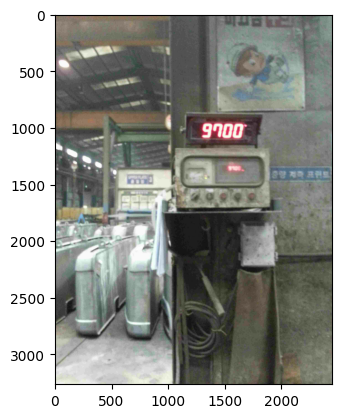

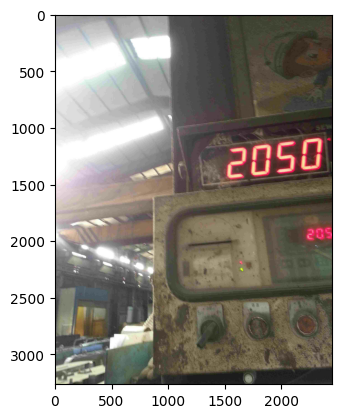

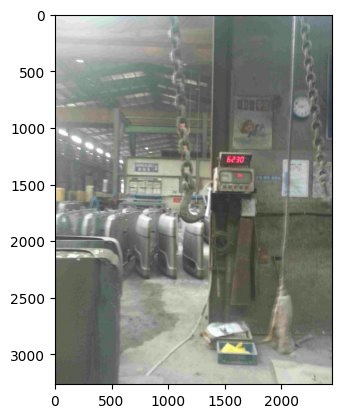

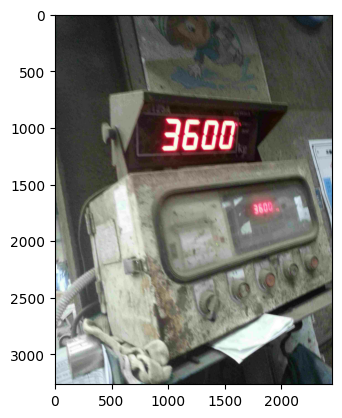

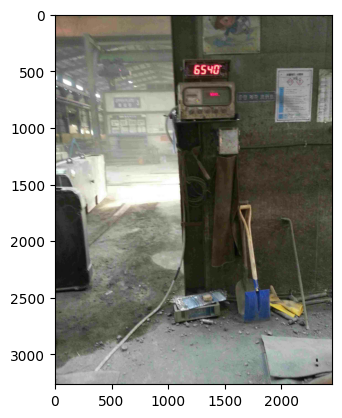

In [7]:
# random 함수를 통해 전체 이미지에서 5개를 임의로 추출합니다.
sample_list = random.sample(all_image_list, 5)

# matplotlib의 imread 함수는 파일의 경로를 입력받아 (높이, 너비, 채널 수)의 3차원 배열 형태로 반환합니다.
# matplotlib의 imshow 함수는 넘파이 배열을 입력받아 이미지를 사용자가 보기쉬운 사이즈로 조정하여 보여주며, 실제 크기를 짐작할수 있도록 눈금을 제공합니다.
for random_image_path in sample_list:
    image = plt.imread(random_image_path)
    plt.imshow(image)
    plt.show()

### 시각화 결과
- 시각화 결과 일반적인 이미지들은 (Width:2500,Height:3500) 정도의 크기를 가졌습니다.
- 타겟의 크기나 각도, 뱡향 등이 일관성이 없는 것으로 관찰됩니다.  
- 보다 정확한 분석을 위해 통계적 분석을 진행합니다.

## 3. 데이터 통계 분석

In [8]:
# 경로 지정 : whole_data.json 파일의 경로를 아래에 지정해주세요
whole_dataset = 'dataset/datalist/whole_data.json'
with open(whole_dataset) as load_f:
    whole_file = json.load(load_f)

# whole_data.json 데이터는 "" 로 감싸져 있어 텍스트로 인식됩니다.
# json(dictionary) 타입으로 읽기위해 literal_eval함수를 적용시켜줍니다.
whole_file = literal_eval(whole_file)

In [9]:
# json 파일을 5개 정도 읽어 구조 확인
for index, key in enumerate(whole_file):
  print(key, whole_file[key])
  if index >= 5:
    break

images/02402.jpg {'height': 3264, 'width': 2448, 'content_ann': {'bboxes': [[1113, 366, 1290, 366, 1290, 636, 1113, 636], [1681, 1139, 1728, 1139, 1728, 1211, 1681, 1211], [1740, 1140, 1787, 1140, 1787, 1215, 1740, 1215], [1309, 392, 1489, 392, 1489, 653, 1309, 653], [1501, 409, 1678, 409, 1678, 664, 1501, 664], [1691, 426, 1863, 426, 1863, 673, 1691, 673], [1799, 1145, 1844, 1145, 1844, 1215, 1799, 1215], [1858, 1147, 1902, 1147, 1902, 1218, 1858, 1218]]}, 'texts': ['6', '6', '2', '2', '0', '0', '0', '0'], 'cares': [1, 1, 1, 1, 1, 1, 1, 1], 'labels': [[1], [1], [1], [1], [1], [1], [1], [1]]}
images/00299.jpg {'height': 3264, 'width': 2448, 'content_ann': {'bboxes': [[1216, 1291, 1394, 1291, 1394, 1531, 1216, 1531], [1399, 1292, 1586, 1292, 1586, 1546, 1399, 1546], [1674, 1296, 1760, 1296, 1760, 1546, 1674, 1546], [1770, 1294, 1933, 1294, 1933, 1550, 1770, 1550], [1743, 2031, 1811, 2031, 1811, 2124, 1743, 2124], [1806, 2026, 1870, 2026, 1870, 2126, 1806, 2126], [1893, 2023, 1925, 2023,

In [10]:
# json 파일 분석
# json 파일 구조:
# - key: 이미지의 경로
# - value: 이미지의 메타 정보 (높이, 너비, 바운딩 박스 등)

# 첫 번째 키-값 쌍을 출력하기 위한 코드입니다.
for key, value in whole_file.items():
    print('Image Path:', key)  # 이미지의 경로
    print('Image Metadata:', value)  # 이미지의 메타 정보
    break  # 첫 번째 키-값 쌍만 출력하고 루프를 종료합니다.

Image Path: images/02402.jpg
Image Metadata: {'height': 3264, 'width': 2448, 'content_ann': {'bboxes': [[1113, 366, 1290, 366, 1290, 636, 1113, 636], [1681, 1139, 1728, 1139, 1728, 1211, 1681, 1211], [1740, 1140, 1787, 1140, 1787, 1215, 1740, 1215], [1309, 392, 1489, 392, 1489, 653, 1309, 653], [1501, 409, 1678, 409, 1678, 664, 1501, 664], [1691, 426, 1863, 426, 1863, 673, 1691, 673], [1799, 1145, 1844, 1145, 1844, 1215, 1799, 1215], [1858, 1147, 1902, 1147, 1902, 1218, 1858, 1218]]}, 'texts': ['6', '6', '2', '2', '0', '0', '0', '0'], 'cares': [1, 1, 1, 1, 1, 1, 1, 1], 'labels': [[1], [1], [1], [1], [1], [1], [1], [1]]}


In [11]:
# 폴더 내의 이미지 순서와 json 파일 내의 이미지 순서가 일치하지 않을 수 있으므로,
# json 파일 정보를 사용하여 이미지와 라벨 정보를 매칭하는 데이터프레임을 생성하여 분석합니다.

# 라벨 정보를 저장할 리스트를 초기화합니다.
height_list = []
width_list = []
img_path_list = []
Bounding_Boxes_list = []
texts_list = []
cares_list = []
label_list = []

for filename, label_info in whole_file.items():
    # 이미지의 높이와 너비 정보를 저장합니다.
    height_list.append(label_info['height'])
    width_list.append(label_info['width'])

    # 분석 환경의 이미지 경로와 json 파일 내의 경로가 다를 수 있으므로 수정합니다.
    img_path = os.path.join(image_root_path, filename.split('/')[-1])
    img_path_list.append(img_path)

    # 이미지에 해당하는 라벨 정보를 추출하여 저장합니다.
    Bounding_Boxes_list.append(label_info['content_ann']['bboxes'])
    texts_list.append(label_info['texts']) # 텍스트 내용
    cares_list.append(label_info['cares']) # 글자 수
    label_list.append(label_info['labels'])

In [12]:
# 이미지 경로 및 라벨 정보를 포함하는 데이터 프레임 생성
img_info_df = pd.DataFrame({
    'Height': height_list,
    'Width': width_list,
    'Image_Path': img_path_list,
    'Bounding_Boxes': Bounding_Boxes_list,
    'Texts': texts_list,
    'Cares': cares_list,
    'Label': label_list
})

img_info_df

Height  Width                     Image_Path  \
0       3264   2448  dataset/data/images/02402.jpg   
1       3264   2448  dataset/data/images/00299.jpg   
2       3264   2448  dataset/data/images/01464.jpg   
3       3264   2448  dataset/data/images/02336.jpg   
4       3264   2448  dataset/data/images/01263.jpg   
...      ...    ...                            ...   
3889    3264   2448  dataset/data/images/01992.jpg   
3890    3264   2448  dataset/data/images/01674.jpg   
3891    3264   2448  dataset/data/images/03844.jpg   
3892    3264   2448  dataset/data/images/02839.jpg   
3893    3264   2448  dataset/data/images/03659.jpg   

                                         Bounding_Boxes  \
0     [[1113, 366, 1290, 366, 1290, 636, 1113, 636],...   
1     [[1216, 1291, 1394, 1291, 1394, 1531, 1216, 15...   
2     [[900, 1242, 1085, 1242, 1085, 1496, 900, 1496...   
3     [[1114, 853, 1277, 853, 1277, 1095, 1114, 1095...   
4     [[1090, 1138, 1313, 1138, 1313, 1506, 1090, 15...   
...                                                 ...   
3889  [[1255, 1282, 1378, 1282, 1378, 1487, 1255, 14...   
3890  [[1385, 1391, 1421, 1391, 1421, 1511, 1385, 15...   
3891  [[1057, 902, 1185, 902, 1185, 1063, 1057, 1063...   
3892  [[1468, 1300, 1544, 1300, 1544, 1408, 1468, 14...   
3893  [[1092, 617, 1261, 617, 1261, 863, 1092, 863],...   

                               Texts                           Cares  \
0           [6, 6, 2, 2, 0, 0, 0, 0]        [1, 1, 1, 1, 1, 1, 1, 1]   
1           [4, 6, 1, 0, 4, 6, 1, 0]        [1, 1, 1, 1, 1, 1, 1, 1]   
2                       [3, 8, 0, 0]                    [1, 1, 1, 1]   
3           [3, 6, 1, 0, 3, 6, 1, 0]        [1, 1, 1, 1, 1, 1, 1, 1]   
4                 [2, 3, 1, 0, 2, 3]              [1, 1, 1, 1, 1, 1]   
...                              ...                             ...   
3889        [3, 3, 7, 7, 8, 8, 0, 0]        [1, 1, 1, 1, 1, 1, 1, 1]   
3890  [1, 1, 0, 0, 7, 7, 0, 0, 0, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3891        [3, 8, 1, 0, 3, 8, 1, 0]        [1, 1, 1, 1, 1, 1, 1, 1]   
3892                    [4, 5, 5, 0]                    [1, 1, 1, 1]   
3893        [2, 2, 5, 0, 2, 2, 5, 0]        [1, 1, 1, 1, 1, 1, 1, 1]   

                                                  Label  
0              [[1], [1], [1], [1], [1], [1], [1], [1]]  
1              [[1], [1], [1], [1], [1], [1], [1], [1]]  
2                                  [[1], [1], [1], [1]]  
3              [[1], [1], [1], [1], [1], [1], [1], [1]]  
4                        [[1], [1], [1], [1], [1], [1]]  
...                                                 ...  
3889           [[1], [1], [1], [1], [1], [1], [1], [1]]  
3890  [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...  
3891           [[1], [1], [1], [1], [1], [1], [1], [1]]  
3892                               [[1], [1], [1], [1]]  
3893           [[1], [1], [1], [1], [1], [1], [1], [1]]  

[3894 rows x 7 columns]

In [13]:
# path(파일명)으로 정렬합니다.
img_info_df = img_info_df.sort_values('Image_Path')
img_info_df = img_info_df.reset_index(drop=True) # 오름차순 정렬

In [14]:
# text의 길이를 분석하기 위해 길이 정보를 담은 컬럼을 생성합니다.
img_info_df['Text_length'] = img_info_df['Texts'].apply(lambda x: len(x))

In [15]:
img_info_df['Text_length'].unique()

array([ 8,  4,  2,  3, 10,  1,  5,  7,  6,  9])

In [16]:
# 데이터에 중복 데이터가 있는지 확인 -> 없음
img_info_df.duplicated('Image_Path').sum()

0

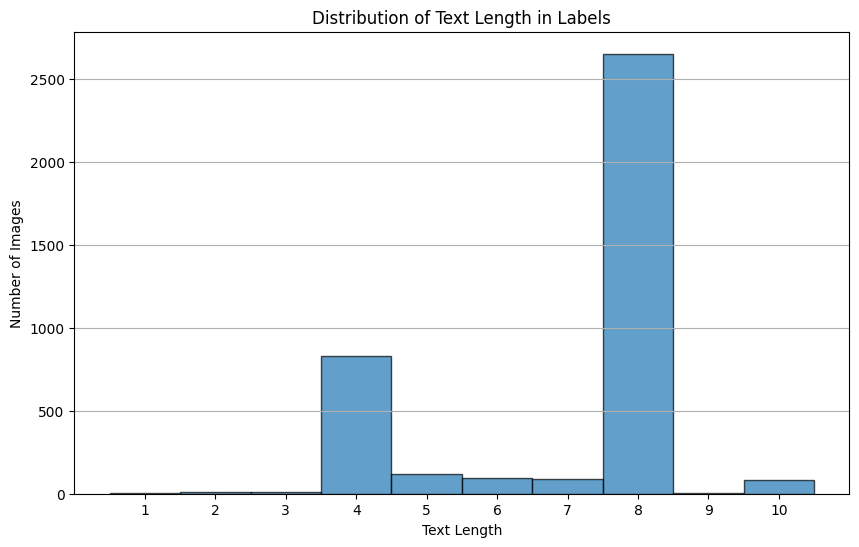

In [17]:
# 라벨링 된 텍스트 길이를 분석합니다.
plt.figure(figsize=(10,6))
bins = [i-0.5 for i in range(1, 12)]
plt.hist(img_info_df['Text_length'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Text Length in Labels')
plt.xlabel('Text Length')
plt.ylabel('Number of Images')
plt.xticks(range(1, 11))
plt.grid(axis='y')
plt.show()

In [18]:
img_info_df['Text_length'].value_counts()

Text_length
8     2653
4      830
5      120
6       94
7       88
10      84
2        8
3        8
1        6
9        3
Name: count, dtype: int64

대부분 8에 몰려있고, 1, 10 등 소수의 데이터도 존재합니다.


해당 데이터가 어노테이션 오류로 인한 것인지 확인이 필요합니다.

In [19]:
# 라벨 길이가 특이한 데이터 확인 1(인덱스 133, 153, 205 등)
label_1_data  = img_info_df[img_info_df['Text_length']==1]
label_1_data

Height  Width                     Image_Path  \
133     3264   2448  dataset/data/images/00134.jpg   
153     3264   2448  dataset/data/images/00154.jpg   
205     3264   2448  dataset/data/images/00207.jpg   
275     3264   2448  dataset/data/images/00277.jpg   
932     3264   2448  dataset/data/images/00935.jpg   
2161    3264   2448  dataset/data/images/02164.jpg   

                                         Bounding_Boxes Texts Cares  Label  \
133      [[1375, 452, 1403, 452, 1403, 527, 1375, 527]]   [3]   [1]  [[1]]   
153      [[1421, 460, 1438, 460, 1438, 512, 1421, 512]]   [3]   [1]  [[1]]   
205        [[1344, 57, 1361, 57, 1361, 119, 1344, 119]]   [3]   [1]  [[1]]   
275      [[1136, 571, 1151, 571, 1151, 622, 1136, 622]]   [3]   [1]  [[1]]   
932          [[1155, 11, 1179, 11, 1179, 64, 1155, 64]]   [3]   [1]  [[1]]   
2161  [[1367, 1492, 1428, 1492, 1428, 1585, 1367, 15...   [0]   [1]  [[1]]   

      Text_length  
133             1  
153             1  
205             1  
275             1  
932             1  
2161            1

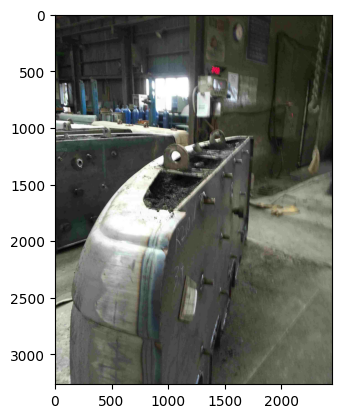

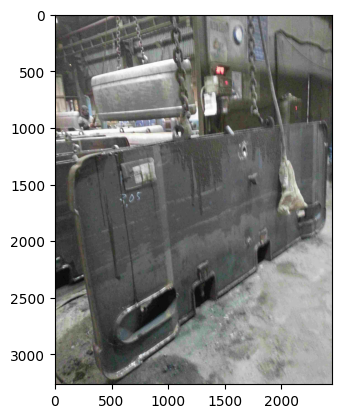

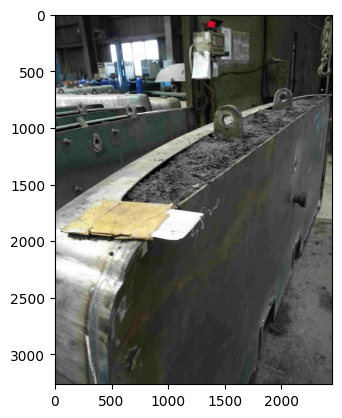

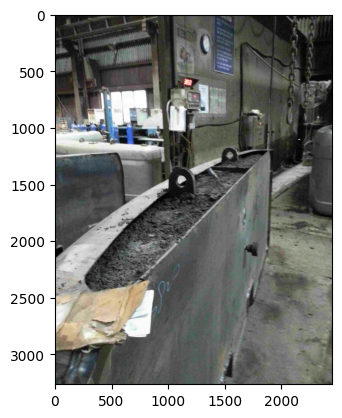

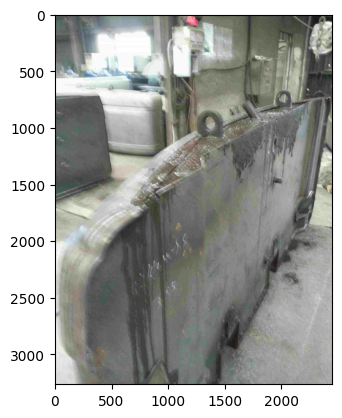

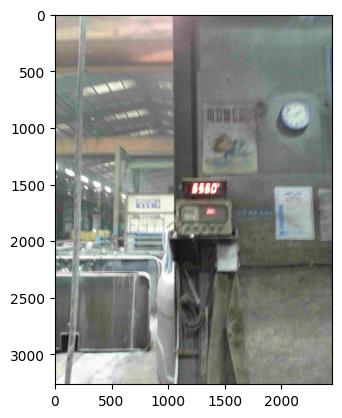

In [20]:
# 라벨 길이가 1인 이미지들을 순차적으로 출력합니다.
for path in label_1_data ['Image_Path']:
    # 이미지를 읽어옵니다.
    image = plt.imread(path)
    # 이미지를 출력합니다.
    plt.imshow(image)
    plt.show()

라벨 길이가 하나뿐인 데이터는 전부 인식이 어려운 사진들임

In [21]:
img_info_df.iloc[133]['Bounding_Boxes']

[[1375, 452, 1403, 452, 1403, 527, 1375, 527]]

In [22]:
img_info_df.iloc[133]['Bounding_Boxes'][0]

[1375, 452, 1403, 452, 1403, 527, 1375, 527]

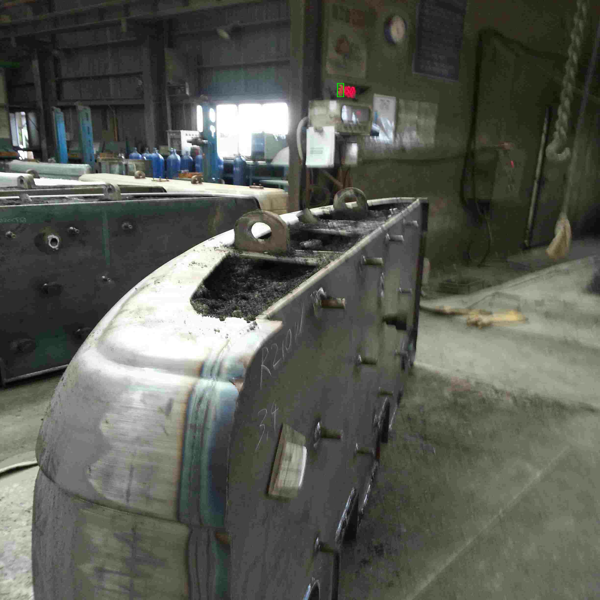

In [23]:
# 133번 인덱스의 이미지에서 라벨 길이가 1인 바운딩 박스를 시각화합니다.
# 이렇게 시각화하여 문제점을 파악할 수 있습니다.

# 133번 인덱스에 해당하는 이미지와 바운딩 박스 정보를 가져옵니다.
sample_image = Image.open(img_info_df.iloc[133]['Image_Path'])
sample_bbox_info = img_info_df.iloc[133]['Bounding_Boxes']

# 이미지 위에 바운딩 박스를 그리기 위한 드로잉 객체를 생성합니다.
draw = ImageDraw.Draw(sample_image, 'RGBA')  # RGBA는 Red, Green, Blue, Alpha(밝기)

# 바운딩 박스의 색상 및 스타일 정보를 설정합니다.
box_color_RGBA  = (0,255,0,255) # 초록색 테두리
fill_color_RGBA = (0,255,0,50)  # 약간의 투명도를 가진 초록색 채우기


# draw.rectangle( (point1_x, point1_y, point2_x, point2_y) , outline=(0,255,0), width=3)
# 바운딩 박스의 좌상단 꼭짓점 좌표 : point1_x, point1_y
# 바운딩 박스의 우하단 꼭짓점 좌표 : point2_x, point2_y
# 바운딩 박스의 좌상단과 우하단 좌표를 사용하여 사각형을 그립니다.
draw.rectangle((sample_bbox_info[0][0],sample_bbox_info[0][1],sample_bbox_info[0][4],sample_bbox_info[0][5]), outline=box_color_RGBA, fill=fill_color_RGBA, width = 3)

# 이미지의 크기를 조정하고 화면에 표시합니다.
sample_image = sample_image.resize((600,600))
sample_image
# plt.imshow(sample_image)
# plt.show()

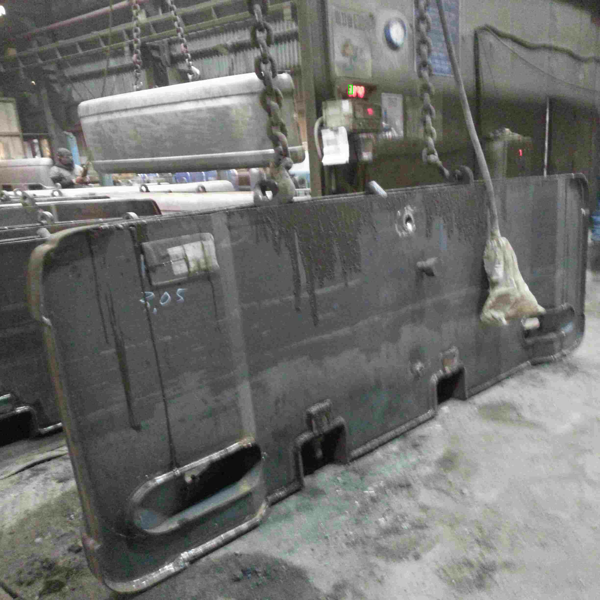

In [24]:
# 153번 인덱스의 이미지에서 라벨 길이가 1인 바운딩 박스를 시각화합니다.

# 153번 인덱스에 해당하는 이미지와 바운딩 박스 정보를 로드합니다.
sample_image = Image.open(img_info_df.iloc[153]['Image_Path'])
sample_bbox_info = img_info_df.iloc[153]['Bounding_Boxes']

# 이미지 위에 바운딩 박스를 그리기 위한 드로잉 객체를 생성합니다.
draw = ImageDraw.Draw(sample_image, 'RGBA')

# 바운딩 박스의 색상 및 스타일 정보를 설정합니다.
box_color_RGBA = (0, 255, 0, 255)    # 초록색 테두리
fill_color_RGBA = (0, 255, 0, 50)    # 약간의 투명도를 가진 초록색 채우기

# 바운딩 박스의 좌상단과 우하단 좌표를 사용하여 사각형을 그립니다.
draw.rectangle(
    (sample_bbox_info[0][0], sample_bbox_info[0][1], sample_bbox_info[0][4], sample_bbox_info[0][5]),
    outline=box_color_RGBA,
    fill=fill_color_RGBA,
    width=3
)

# 이미지의 크기를 조정하고 화면에 출력합니다.
sample_image = sample_image.resize((600, 600))
sample_image
# plt.imshow(sample_image)
# plt.show()

라벨 길이가 1인 이미지들은 각도, 화질, 해상도 등의 문제로 라벨 인식이 어려운 것을 확인

In [25]:
# 라벨 길이가 특이한 데이터 확인 10(인덱스 93, 103, 105 등)
label_10_list = img_info_df[img_info_df['Text_length']==10]
label_10_list

Height  Width                     Image_Path  \
93      3264   2448  dataset/data/images/00094.jpg   
103     3264   2448  dataset/data/images/00104.jpg   
105     3264   2448  dataset/data/images/00106.jpg   
135     3264   2448  dataset/data/images/00136.jpg   
224     3264   2448  dataset/data/images/00226.jpg   
...      ...    ...                            ...   
3770    3264   2448  dataset/data/images/03773.jpg   
3782    3264   2448  dataset/data/images/03785.jpg   
3859    3264   2448  dataset/data/images/03862.jpg   
3860    3264   2448  dataset/data/images/03863.jpg   
3869    3264   2448  dataset/data/images/03872.jpg   

                                         Bounding_Boxes  \
93    [[1055, 988, 1110, 988, 1110, 1136, 1055, 1136...   
103   [[1038, 1393, 1098, 1393, 1098, 1559, 1038, 15...   
105   [[1316, 1383, 1350, 1383, 1350, 1475, 1316, 14...   
135   [[1054, 1807, 1105, 1807, 1105, 1966, 1054, 19...   
224   [[1180, 1223, 1256, 1223, 1256, 1398, 1180, 13...   
...                                                 ...   
3770  [[878, 1534, 952, 1534, 952, 1709, 878, 1709],...   
3782  [[1042, 1091, 1087, 1091, 1087, 1252, 1042, 12...   
3859  [[1025, 803, 1061, 803, 1061, 916, 1025, 916],...   
3860  [[1190, 1613, 1250, 1613, 1250, 1759, 1190, 17...   
3869  [[719, 659, 820, 659, 820, 920, 719, 920], [82...   

                               Texts                           Cares  \
93    [1, 0, 7, 0, 0, 1, 0, 7, 0, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
103   [1, 0, 7, 0, 0, 1, 0, 7, 0, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
105   [1, 0, 7, 1, 0, 1, 0, 7, 1, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
135   [1, 2, 5, 3, 0, 1, 2, 5, 3, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
224   [1, 1, 7, 0, 0, 1, 1, 7, 0, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
...                              ...                             ...   
3770  [1, 1, 7, 1, 0, 1, 1, 7, 1, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3782  [1, 0, 7, 1, 0, 1, 0, 7, 1, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3859  [1, 0, 7, 0, 0, 1, 0, 7, 0, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3860  [1, 0, 7, 3, 0, 1, 0, 7, 3, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3869  [1, 0, 7, 1, 0, 1, 0, 7, 1, 0]  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   

                                                  Label  Text_length  
93    [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...           10  
103   [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...           10  
105   [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...           10  
135   [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...           10  
224   [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...           10  
...                                                 ...          ...  
3770  [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...           10  
3782  [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...           10  
3859  [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...           10  
3860  [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...           10  
3869  [[1], [1], [1], [1], [1], [1], [1], [1], [1], ...           10  

[84 rows x 8 columns]

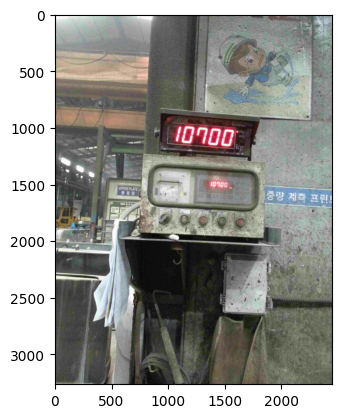

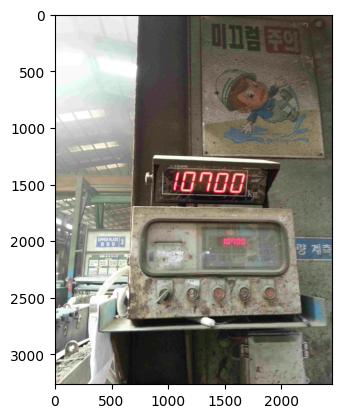

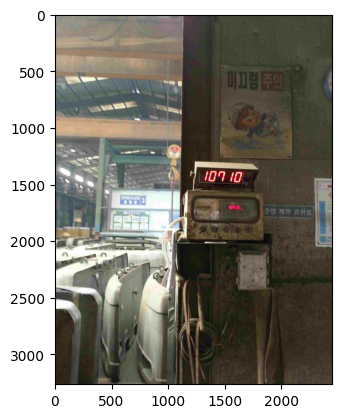

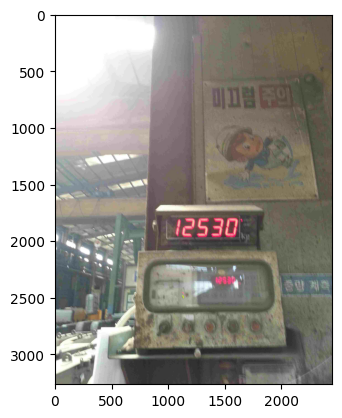

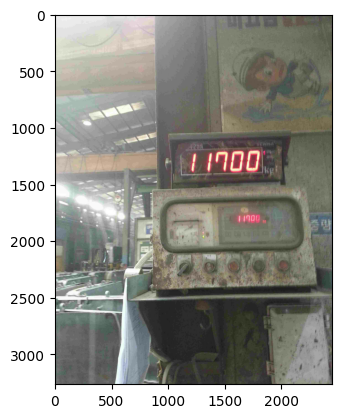

In [26]:
# 'text_length'가 10인 이미지 중 첫 5개의 이미지를 시각화합니다.
# 이러한 이미지들은 라벨의 길이가 특이하므로 시각적으로 확인하려 합니다.

for path in label_10_list['Image_Path'][:5]: # 개수가 84개이므로 5개만 확인
    plt.imshow(plt.imread(path))
    plt.show()

텍스트 길이가 10인 사진들은 숫자가 5글자로 구성되었으며, 위 아래 패널이 선명하게 보이는 것을 확인

## image_size 분석

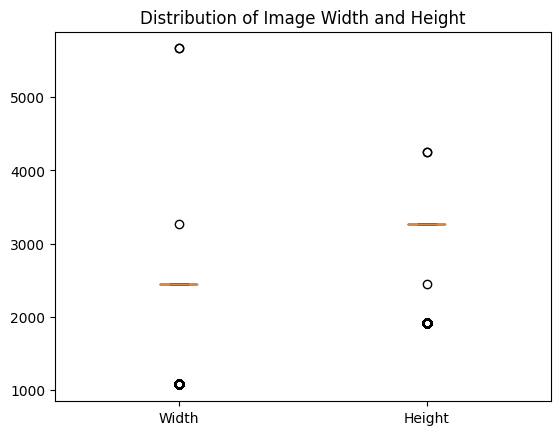

In [27]:
# 이미지의 가로와 세로 사이즈를 박스 플롯으로 시각화합니다.
plt.boxplot([img_info_df['Width'], img_info_df['Height']])
plt.xticks([1, 2],['Width', 'Height'])
plt.title('Distribution of Image Width and Height')
plt.show()

대부분의 이미지 사이즈는 특정 범위에 몰려 있지만, 몇몇 이상치도 관측됩니다.

In [28]:
# 각 가로, 세로 사이즈의 분포를 확인합니다.
print('가로 사이즈 종류:',img_info_df.value_counts('Width'),'\n')
print('세로 사이즈 종류:',img_info_df.value_counts('Height'))

가로 사이즈 종류: Width
2448    3689
1080     202
5664       2
3264       1
Name: count, dtype: int64 

세로 사이즈 종류: Height
3264    3689
1920     202
4248       2
2448       1
Name: count, dtype: int64


In [29]:
# 일반적이지 않은 가로 사이즈를 가진 이미지의 인덱스를 확인합니다.
width_starnge_index = img_info_df[(img_info_df['Width']== 3264) | (img_info_df['Width']== 5664)]
width_starnge_index

Height  Width                     Image_Path  \
1081    4248   5664  dataset/data/images/01084.jpg   
1391    4248   5664  dataset/data/images/01394.jpg   
2452    2448   3264  dataset/data/images/02455.jpg   

                                         Bounding_Boxes  \
1081  [[2935, 1710, 3040, 1710, 3040, 1853, 2935, 18...   
1391  [[3430, 1635, 3465, 1635, 3465, 1686, 3430, 16...   
2452  [[2250, 763, 2275, 763, 2275, 798, 2250, 798],...   

                         Texts                     Cares  \
1081  [2, 2, 0, 0, 2, 2, 0, 0]  [1, 1, 1, 1, 1, 1, 1, 1]   
1391              [2, 2, 0, 0]              [1, 1, 1, 1]   
2452              [3, 1, 5, 0]              [1, 1, 1, 1]   

                                         Label  Text_length  
1081  [[1], [1], [1], [1], [1], [1], [1], [1]]            8  
1391                      [[1], [1], [1], [1]]            4  
2452                      [[1], [1], [1], [1]]            4

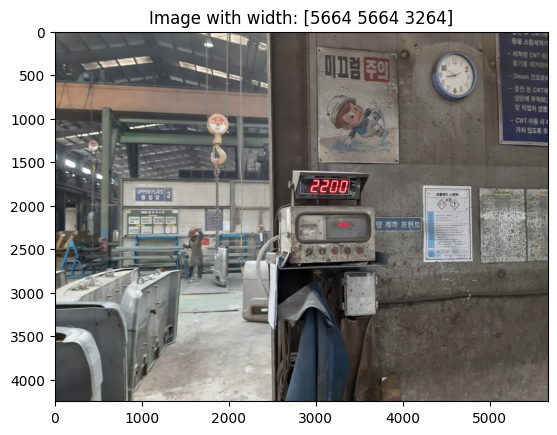

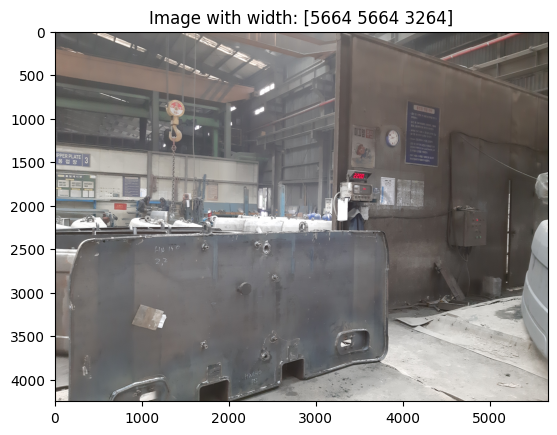

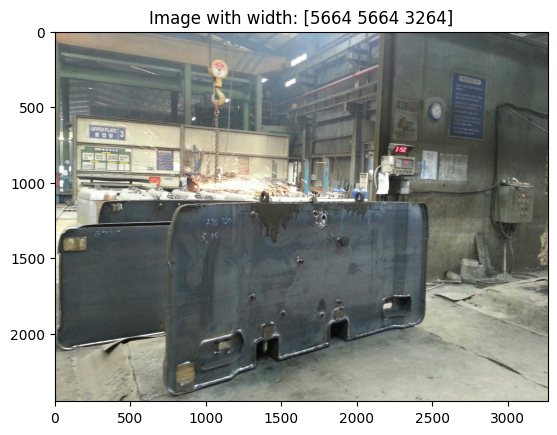

In [30]:
# 해당 인덱스에 해당하는 이미지를 시각화합니다.
for img_path in width_starnge_index['Image_Path'].values:
    plt.imshow(plt.imread(img_path))
    plt.title(f"Image with width: {width_starnge_index['Width'].values}")
    plt.show()

- 특이한 가로 길이를 가진 사진은 다른 촬영 장비를 사용했을 가능성이 있음. 그러나 사진 자체에는 이상한 점이 없음

- 이미지 시각화 분석 결과
1. 라벨의 텍스트 길이와 저울에 표시된 무게 사이에 연관성이 있음.
2. 텍스트 길이가 10인 경우, 이미지의 상단 및 하단 부분 모두에서 5자리 숫자를 선명하게 인식할 수 있음.
3. 이미지의 상단에 위치한 숫자와 하단의 숫자는 동일한 값을 가짐.
    - 이 정보는 딥러닝 모델의 인식률을 향상시키기 위해 상단 숫자에 초점을 맞추는 데 도움이 될 것으로 예상됨.

### 어노테이션 정보 분석

- 분석 대상인 AI 학습 데이터셋의 JSON 파일은 각 숫자에 대해 8개의 bounding box 좌표를 제공합니다.
- 하지만 대부분의 bounding box 시각화 도구나 딥러닝 모델은 이와 다른 형식을 요구합니다.
-  이를 맞추기 위해 어노테이션 정보를 변환하고, 어떻게 표현되는지 시각적으로 확인해보겠습니다.

In [31]:
# 8개의 각 숫자에 해당하는 boundig box 좌표가
# 좌상단(x,y), 우상단(x,y), 우하단(x,y), 좌하단(x,y)로 제공되어 있습니다.
img_info_df['Bounding_Boxes'][0]

[[1132, 1576, 1173, 1576, 1173, 1707, 1132, 1707],
 [1194, 1566, 1284, 1566, 1284, 1714, 1194, 1714],
 [1291, 1562, 1397, 1562, 1397, 1714, 1291, 1714],
 [1402, 1566, 1495, 1566, 1495, 1731, 1402, 1731],
 [1357, 2007, 1385, 2007, 1385, 2059, 1357, 2059],
 [1385, 2003, 1416, 2003, 1416, 2057, 1385, 2057],
 [1416, 2002, 1446, 2002, 1446, 2057, 1416, 2057],
 [1444, 2007, 1484, 2007, 1484, 2054, 1444, 2054]]

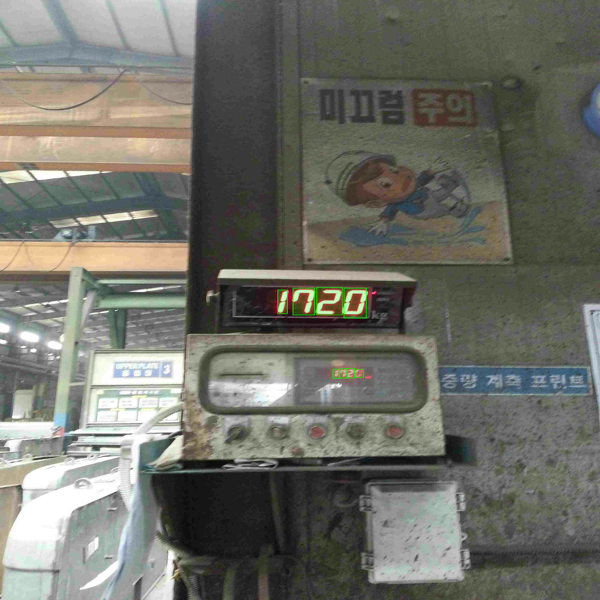

In [32]:
sample_image = Image.open(img_info_df.iloc[0]['Image_Path'])
sample_bbox_info = img_info_df.iloc[0]['Bounding_Boxes']
draw = ImageDraw.Draw(sample_image, 'RGBA')


#draw.rectangle( (point1_x, point1_y, point2_x, point2_y) , outline=(0,255,0), width=3)
#바운딩 박스의 좌상단 꼭짓점 좌표 : point1_x, point1_y
#바운딩 박스의 우하단 꼭짓점 좌표 : point2_x, point2_y

# bounding box의 색상 및 스타일 정보
box_color_RGBA  = (0,255,0,255)
fill_color_RGBA = (0,255,0,50)

# 본 작업의 어노테이션 데이터는 1글자당 8개의 좌표값으로 구성됩니다.
# (좌상단x, 좌상단y, 우상단x, 우상단y, 우하단x, 우하단y, 좌하단x, 좌하단y)
# 그러나, pillow의 rectangle 함수는 좌상단과 우하단의 x,y 좌표 4개만을 요구합니다. (좌상단x, 좌상단y, 우하단x, 우하단y)
# 따라서 8개 필요한 좌표만 추출하여 bounding box를 그려주겠습니다(0번, 1번, 4번, 5번째 값)

for box in sample_bbox_info:
    draw.rectangle((box[0],box[1],box[4],box[5]), outline=box_color_RGBA, fill=fill_color_RGBA, width = 3)

sample_image = sample_image.resize((600,600))
sample_image

In [33]:
sample_bbox_info

[[1132, 1576, 1173, 1576, 1173, 1707, 1132, 1707],
 [1194, 1566, 1284, 1566, 1284, 1714, 1194, 1714],
 [1291, 1562, 1397, 1562, 1397, 1714, 1291, 1714],
 [1402, 1566, 1495, 1566, 1495, 1731, 1402, 1731],
 [1357, 2007, 1385, 2007, 1385, 2059, 1357, 2059],
 [1385, 2003, 1416, 2003, 1416, 2057, 1385, 2057],
 [1416, 2002, 1446, 2002, 1446, 2057, 1416, 2057],
 [1444, 2007, 1484, 2007, 1484, 2054, 1444, 2054]]

In [34]:
sample_bbox_info[0][:]

[1132, 1576, 1173, 1576, 1173, 1707, 1132, 1707]

In [35]:
sample_bbox_info[1]

[1194, 1566, 1284, 1566, 1284, 1714, 1194, 1714]

In [36]:
sample_bbox_info[4]

[1357, 2007, 1385, 2007, 1385, 2059, 1357, 2059]

In [37]:
sample_bbox_info[5]

[1385, 2003, 1416, 2003, 1416, 2057, 1385, 2057]

In [38]:
for box in sample_bbox_info:
    print(box[0],box[1],box[4],box[5])

1132 1576 1173 1707
1194 1566 1284 1714
1291 1562 1397 1714
1402 1566 1495 1731
1357 2007 1385 2059
1385 2003 1416 2057
1416 2002 1446 2057
1444 2007 1484 2054


### 어노테이션 결과 분석
 - 어노테이션 정보를 시각화하여 살펴본 결과, 각각의 숫자마다 별도의 bounding box 정보가 제공되고 있음을 확인했습니다.
 - 우리는 이를 이용하여 2가지 방법으로 학습을 진행할 수 있습니다.
     - **1) bounding box가 각 숫자별로 아닌 전체 문자열 덩어리 단위로 지정하여 학습을 진행하는 방법**
     - **2) bounding box를 각 숫자 단위로 지정하여 학습을 진행하는 방법**
     
- 1번과 2번 모두 각각 장단점은 아래와 같습니다.


- **1) 전체 문자열 덩어리 단위로 바운딩 박스를 지정하는 방법:**
- **장점:**
- 한 번의 예측으로 전체 숫자 문자열을 탐지할 수 있으므로 복잡도가 상대적으로 낮습니다.
- 인접한 숫자들 사이의 오버랩이나 충돌 문제를 피할 수 있습니다.
- 전체 숫자 문자열에 대한 문맥 정보를 활용하여 인식 정확도를 높일 수 있을 가능성이 있습니다.
- **단점:**
- 후처리 단계에서 별도의 숫자 분할 작업이 필요하게 될 수 있습니다.
- 전체 문자열의 형태나 배치가 불규칙적으로 변할 경우 인식 정확도에 영향을 줄 수 있습니다.
- 탐지하고자 하는 숫자가 4자리라고 한다면 가능한 모든 경우의 수는 0000~9999까지 1만개의 라벨이 필요합니다.
- 만약 학습 데이터에 1만개의 라벨이 모두 존재하지 않는다면, 추론 시 누락된 라벨에 대해서 전혀 탐지하지 못할 가능성이 있습니다.



- **2) 각 숫자 단위로 바운딩 박스를 지정하는 방법:**
- **장점:**
- 개별 숫자 인식의 정확도가 높아질 수 있습니다.
- 숫자 간의 간격이나 배열이 불규칙적이거나 변동이 클 때, 각 숫자를 별도로 인식하는 것이 더 효과적일 수 있습니다.
- 후처리 단계에서 특정 숫자의 위치나 배열에 대한 정보를 활용할 수 있습니다.
- **단점:**
- 학습 및 추론 시에 다수의 바운딩 박스를 동시에 예측해야 하므로 복잡도가 증가할 수 있습니다.
- 숫자들이 매우 가까이 있을 경우, 인접한 바운딩 박스 간의 오버랩이나 충돌이 발생할 수 있습니다.
- 탐지된 숫자가 순서대로 탐지되지 않을 수 있으므로 그럴 경우에 좌표를 기준으로 정렬하는 후처리가 요구될 수 있습니다.

- **결론:**
- 두 방식 모두에는 장단점이 있으며, 실제 환경에서의 성능은 여러 요인에 따라 달라질 수 있습니다. 따라서, 가능하다면 두 가지 방식을 모두 실험하여 가장 적합한 방식을 선택하는 것이 좋습니다. 실제 데이터와 상황에 따라 효율적인 방식이 달라질 수 있으므로, 각 방식의 성능을 꼼꼼히 평가하는 것이 중요합니다.

- **우선, 현재 보유하고 있는 Train 데이터(3894장)가 1만 장이 아니기 때문에 2번 방식으로 학습을 진행하겠습니다.**